In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt 
import spacy 
import math
import scipy
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
import scipy

In [2]:
brunch_cafe = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Competition/brunch_cafe.pkl")

In [3]:
health_take_away = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Competition/health_take_away.pkl")

In [33]:
brunch_cafe_id = brunch_cafe['business_id'].unique()
health_take_away_id = health_take_away['business_id'].unique()

In [7]:
checkin = pd.read_pickle('C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/rester_checkin.pkl') 

In [36]:
checkin_target_brunch = checkin[checkin['business_id'].apply(lambda x: x in brunch_cafe_id)]

In [38]:
checkin_target_health = checkin[checkin['business_id'].apply(lambda x: x in health_take_away_id)]

In [42]:
checkin_target = pd.concat ([checkin_target_brunch, checkin_target_health],axis = 0)

In [50]:
checkin_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 30 to 59301
Data columns (total 2 columns):
business_id    2120 non-null object
date           2120 non-null object
dtypes: object(2)
memory usage: 49.7+ KB


In [49]:
checkin_target = checkin_target.dropna()

In [51]:
new_df = pd.DataFrame(checkin_target['date'].apply(lambda x: str(x).split(',')).tolist(), index=checkin_target['business_id']).stack()
new_df = new_df.reset_index([0, 'business_id'])
new_df.columns = ['business_id', 'checkin_date']

In [53]:
checkin_target_reshape = new_df

In [91]:
checkin_target_reshape['checkin_date_time'] = checkin_target_reshape['checkin_date'].apply(lambda x: x.split()[1])

In [92]:
checkin_target_reshape['checkin_date_2'] = checkin_target_reshape['checkin_date'].apply(lambda x: x.split()[0])

In [93]:
checkin_target_reshape = checkin_target_reshape.loc[:,['business_id','checkin_date_2','checkin_date_time']]

In [94]:
checkin_target_reshape.columns = ['business_id','checkin_date','checkin_date_time']

In [95]:
checkin_target_reshape['checkin_date'] = pd.to_datetime(checkin_target_reshape['checkin_date'])

In [96]:
checkin_target_reshape['checkin_date_time'] = pd.to_timedelta(checkin_target_reshape['checkin_date_time'])

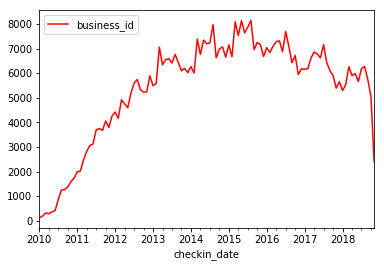

In [86]:
count_checkin_df = checkin_target_reshape.set_index('checkin_date').groupby(pd.Grouper(freq = 'M')).count()
count_checkin_df.reset_index(level=0, inplace=True)
count_checkin_df.plot(kind='line',x='checkin_date',y='business_id',color='red')

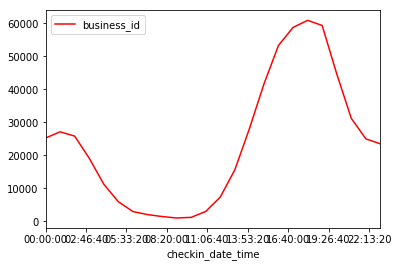

In [101]:
count_checkin_df2 = checkin_target_reshape.set_index('checkin_date_time').groupby(pd.Grouper(freq = 'H')).count()
count_checkin_df2.reset_index(level=0, inplace=True)
count_checkin_df2.plot(kind='line',x='checkin_date_time',y='business_id',color='red')

In [97]:
checkin_target_reshape['checkin_month'] = pd.DatetimeIndex(checkin_target_reshape['checkin_date']).month

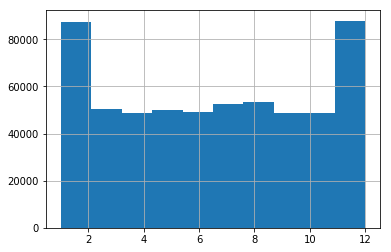

In [99]:
checkin_target_reshape['checkin_month'].hist()

In [98]:
#checkin_target_reshape = checkin_target_reshape.loc[:,['business_id','checkin_date','checkin_date_time']]
checkin_target_reshape

,business_id,checkin_date,checkin_date_time,checkin_month
0,gyFYZV4b_9TxG1ulQNi0Ig,2016-08-25,17:33:35,8
1,gyFYZV4b_9TxG1ulQNi0Ig,2016-09-05,00:26:17,9
2,gyFYZV4b_9TxG1ulQNi0Ig,2016-09-06,16:24:58,9
3,gyFYZV4b_9TxG1ulQNi0Ig,2016-09-10,00:23:25,9
4,gyFYZV4b_9TxG1ulQNi0Ig,2016-10-24,17:45:38,10
5,gyFYZV4b_9TxG1ulQNi0Ig,2016-10-28,16:42:15,10
6,gyFYZV4b_9TxG1ulQNi0Ig,2017-01-05,03:40:52,1
7,gyFYZV4b_9TxG1ulQNi0Ig,2017-01-14,16:59:13,1
8,gyFYZV4b_9TxG1ulQNi0Ig,2017-03-01,16:47:28,3
9,gyFYZV4b_9TxG1ulQNi0Ig,2017-03-15,21:59:18,3


In [5]:
checkin_target_reshape.groupby('checkin_month').count()

,business_id,checkin_date,checkin_date_time
checkin_month,,,
1,43926,43926,43926
2,43196,43196,43196
3,50225,50225,50225
4,48549,48549,48549
5,50131,50131,50131
6,49308,49308,49308
7,52719,52719,52719
8,53422,53422,53422
9,48559,48559,48559


In [102]:
count_checkin_df2

,checkin_date_time,business_id,checkin_date,checkin_month
0,00:00:00,25295,25295,25295
1,01:00:00,27174,27174,27174
2,02:00:00,25868,25868,25868
3,03:00:00,19162,19162,19162
4,04:00:00,11290,11290,11290
5,05:00:00,5985,5985,5985
6,06:00:00,3027,3027,3027
7,07:00:00,2092,2092,2092
8,08:00:00,1512,1512,1512
9,09:00:00,1057,1057,1057


#Data Export

In [1]:
checkin_target_reshape.to_pickle('C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Operation/checkin_clean.pkl')

NameError: name 'checkin_target_reshape' is not defined

In [103]:
count_checkin_df2.to_pickle('C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Operation/count_checkin_df2.pkl')

In [3]:
checkin_target_reshape = pd.read_pickle('C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Operation/checkin_clean.pkl')

In [4]:
checkin_target_reshape.to_csv('C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Operation/checkin_clean.csv')